In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os


🔍 gender class counts:
gender
Men       22069
Women     18290
Unisex     2150
Boys        826
Girls       654
Name: count, dtype: int64


C:\Users\hamza\AppData\Local\Temp\ipykernel_45968\2352727763.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


📊 Saved plot: D:\CODING\Machine Learning\PROJECTS\fashion-product-classifier\data\processed\distribution_plots\gender_distribution.png

🔍 baseColour class counts:
baseColour
Black                9723
White                5537
Blue                 4912
Brown                3494
Grey                 2736
Red                  2452
Green                2114
Pink                 1860
Navy Blue            1789
Purple               1638
Silver               1090
Yellow                777
Beige                 748
Gold                  628
Maroon                581
Orange                530
Olive                 410
Cream                 389
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper              

C:\Users\hamza\AppData\Local\Temp\ipykernel_45968\2352727763.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


📊 Saved plot: D:\CODING\Machine Learning\PROJECTS\fashion-product-classifier\data\processed\distribution_plots\baseColour_distribution.png

🔍 season class counts:
season
Summer    21284
Fall      11298
Winter     8441
Spring     2966
Name: count, dtype: int64


C:\Users\hamza\AppData\Local\Temp\ipykernel_45968\2352727763.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


📊 Saved plot: D:\CODING\Machine Learning\PROJECTS\fashion-product-classifier\data\processed\distribution_plots\season_distribution.png

🔍 articleType class counts:
articleType
Tshirts                7050
Shirts                 3205
Casual Shoes           2843
Watches                2541
Sports Shoes           2015
                       ... 
Cushion Covers            1
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Ipad                      1
Name: count, Length: 142, dtype: int64


C:\Users\hamza\AppData\Local\Temp\ipykernel_45968\2352727763.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


📊 Saved plot: D:\CODING\Machine Learning\PROJECTS\fashion-product-classifier\data\processed\distribution_plots\articleType_distribution.png


--- Displaying Saved Distribution Plots ---


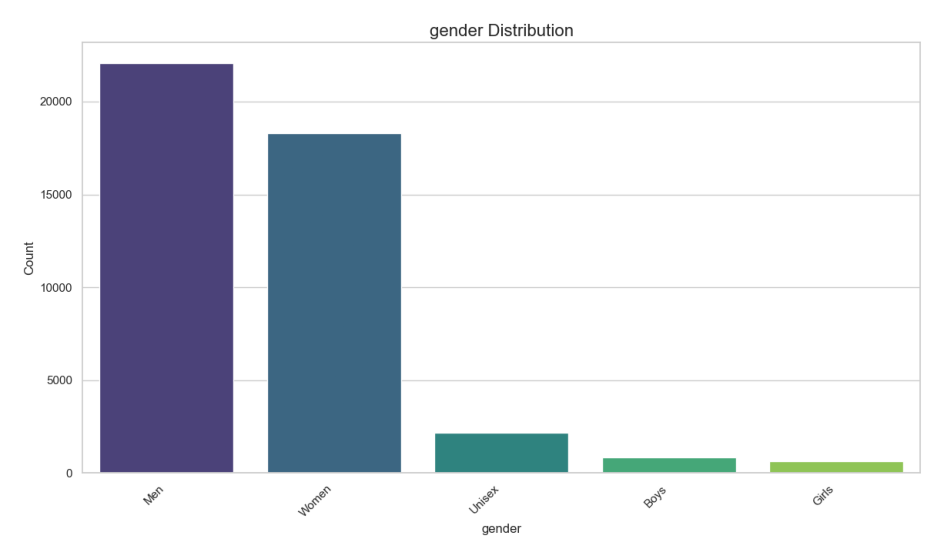

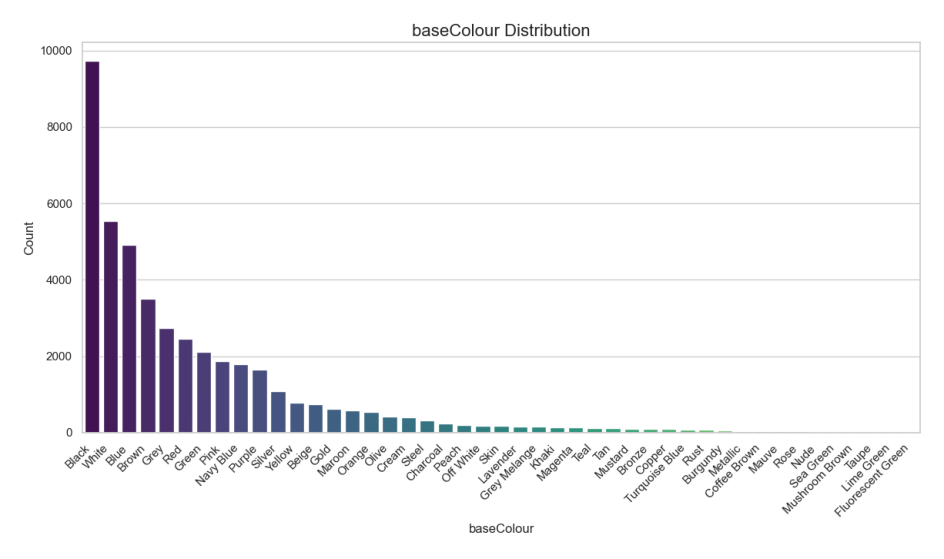

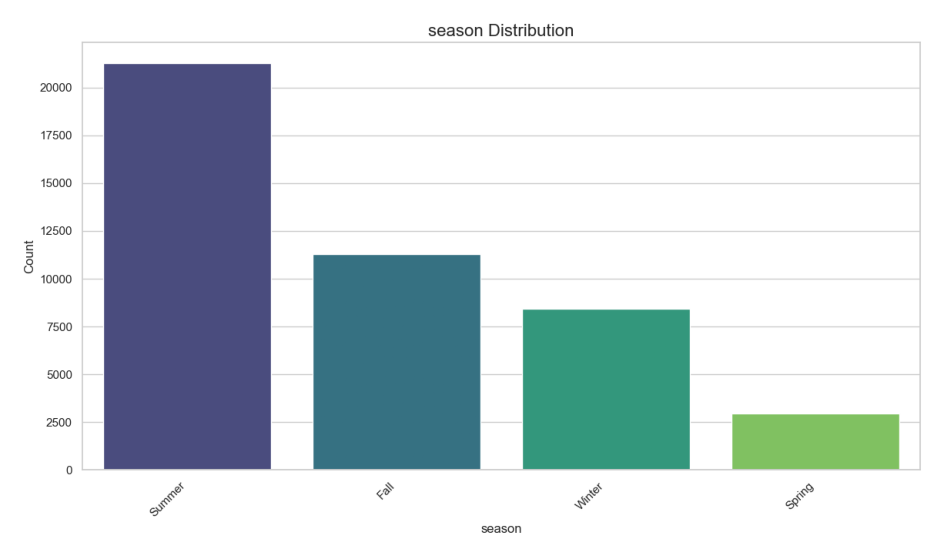

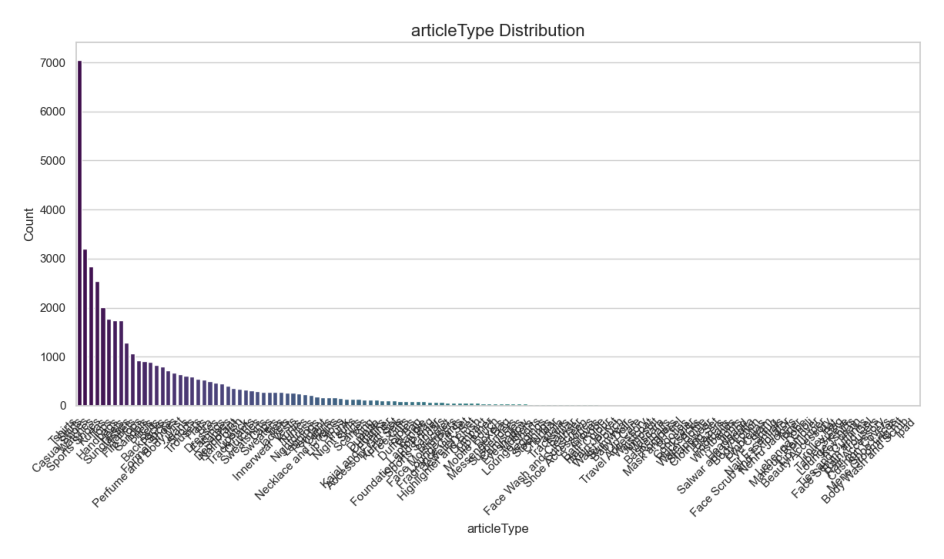

In [4]:

sns.set(style="whitegrid")

def plot_distribution(df, column_name, save_dir):
    """
    Plots and saves distribution bar chart for a specific column.

    Args:
        df (pd.DataFrame): The cleaned dataframe.
        column_name (str): The column to analyze.
        save_dir (str): Directory to save plots.
    
    Returns:
        str: The path to the saved plot.
    """
    value_counts = df[column_name].value_counts()

    # Plot
    plt.figure(figsize=(12, 7))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{column_name} Distribution", fontsize=16)
    plt.ylabel("Count", fontsize=12)
    plt.xlabel(column_name, fontsize=12)

    # Save plot
    os.makedirs(save_dir, exist_ok=True)
    plot_path = os.path.join(save_dir, f"{column_name}_distribution.png")
    plt.tight_layout()
    plt.savefig(plot_path)
    plt.close() # Close the plot to prevent it from displaying immediately
    print(f"📊 Saved plot: {plot_path}")
    
    # Return the path for later use
    return plot_path


def analyze_class_distribution(cleaned_csv_path: str, save_plot_dir: str):
    """
    Load cleaned data, plot distributions, and display the plots at the end.

    Args:
        cleaned_csv_path (str): Path to cleaned CSV file.
        save_plot_dir (str): Folder where distribution plots will be saved.
    """
    df = pd.read_csv(cleaned_csv_path)

    # --- Step 1: Analyze data and save plots ---
    label_columns = ['gender', 'baseColour', 'season', 'articleType']
    saved_plot_paths = [] # List to store the paths of saved plots
    
    for col in label_columns:
        print(f"\n🔍 {col} class counts:\n{df[col].value_counts()}")
        # Generate and save the plot, then get its path
        path = plot_distribution(df, col, save_plot_dir)
        saved_plot_paths.append(path)

    # --- Step 2: Display all the saved plots at the end ---
    print("\n\n--- Displaying Saved Distribution Plots ---")
    for plot_path in saved_plot_paths:
        try:
            # Read the saved image file
            img = mpimg.imread(plot_path)
            
            # Display the image
            plt.figure(figsize=(12, 7))
            plt.imshow(img)
            plt.axis('off') # Hide axes for a cleaner look
            plt.show()
        except FileNotFoundError:
            print(f"Error: Could not find plot at {plot_path}")


if __name__ == "__main__":
    # Use raw strings (r"...") or forward slashes for paths to avoid errors
    cleaned_csv_path = r"D:\CODING\Machine Learning\PROJECTS\fashion-product-classifier\data\processed\cleaned-styles.csv"
    save_plot_dir = r"D:\CODING\Machine Learning\PROJECTS\fashion-product-classifier\data\processed\distribution_plots"

    analyze_class_distribution(cleaned_csv_path, save_plot_dir)